# 0. 패키지 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings # warning 무시
warnings.filterwarnings("ignore")

%matplotlib inline

# titanic 데이터 불러오기

In [2]:
# train 데이터 불러오기
titanic_origin = pd.read_csv("C:/python/datas/titanic/train.csv")
titanic_origin

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,0,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C
912,912,0,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,8.6625,NaN,S
913,913,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S
914,914,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q


In [3]:
# test data 불러오기
titanic_test_origin = pd.read_csv("C:/python/datas/titanic/test.csv")
titanic_test_origin.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

# 1. EDA

## 각 컬럼별 정보

In [4]:
# passengerId: unique id number to each passenger
# survived: passenger survive(1) or died(0)
# pclass: passenger class
# name: name
# gender: gender of passenger
# age: age of passenger
# sibsp: number of siblings/spouses
# parch: number of parents/children
# ticket: ticket number
# fare: amount of money spent on ticket
# cabin: cabin category
# embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

## 컬럼 데이터 파악

In [5]:
titanic_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


### target data(Survived)

In [6]:
# 목표 : Survived를 제외한 다른 컬럼의 데이터를 통해서 test data의 사람이 살아있는지 죽었는지 판단하기

## 필요한 컬럼 파악

### 수치형 데이터 정보 파악

In [7]:
titanic_origin.describe(include = np.number)

,passengerid,survived,pclass,age,sibsp,parch,fare
count,916.000000,916.000000,916.000000,736.000000,916.000000,916.000000,916.000000
mean,457.500000,0.377729,2.292576,29.698370,0.507642,0.361354,32.402710
std,264.570721,0.485084,0.838675,14.185627,1.044866,0.828054,50.506411
min,0.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,228.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,457.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,686.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.017700
max,915.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
titanic_origin.passengerid.nunique() # passengerid는 특성을 반영 못 하므로 제외

916

#### gender 분석

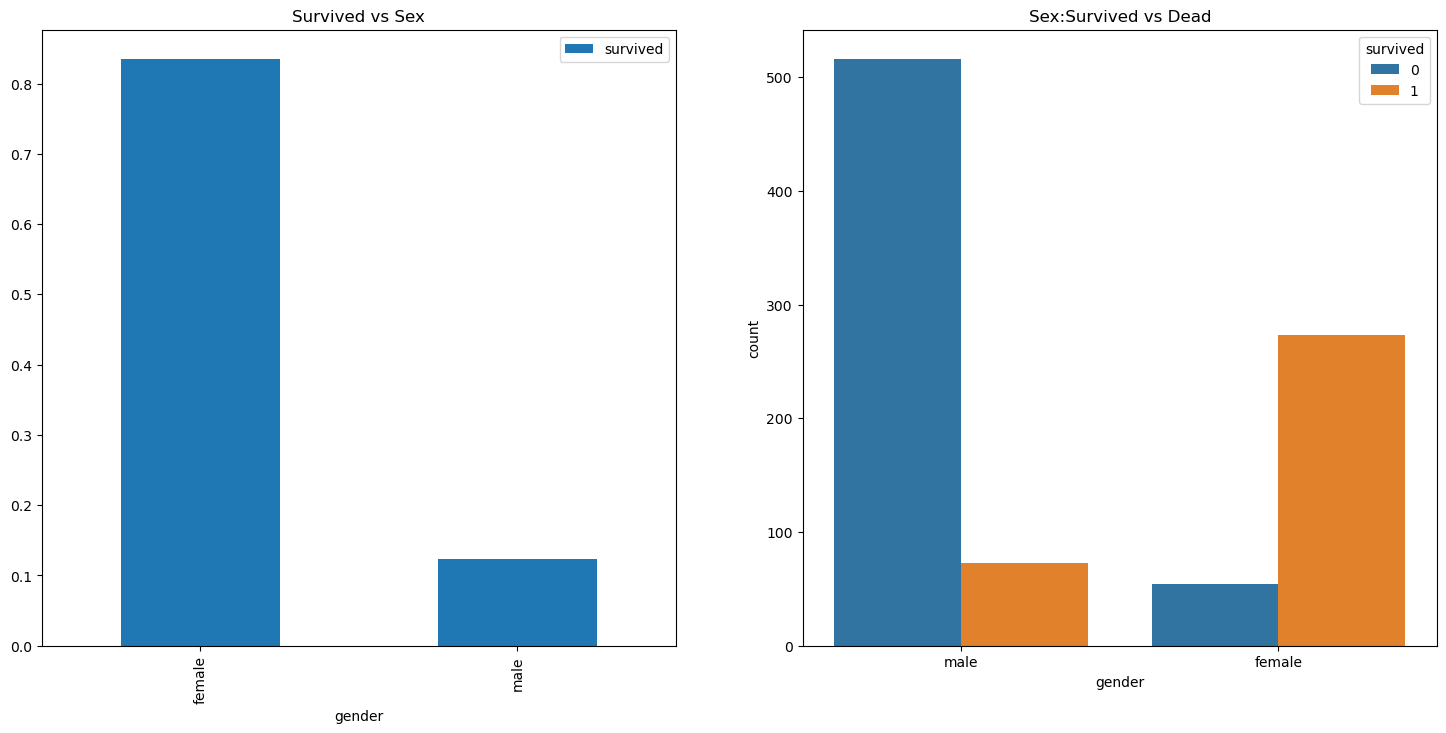

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic_origin[['gender','survived']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('gender',hue='survived',data=titanic_origin,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### pclass 분석

In [10]:
pd.crosstab(titanic_origin.pclass,titanic_origin.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,96,131,227
2,118,76,194
3,356,139,495
All,570,346,916


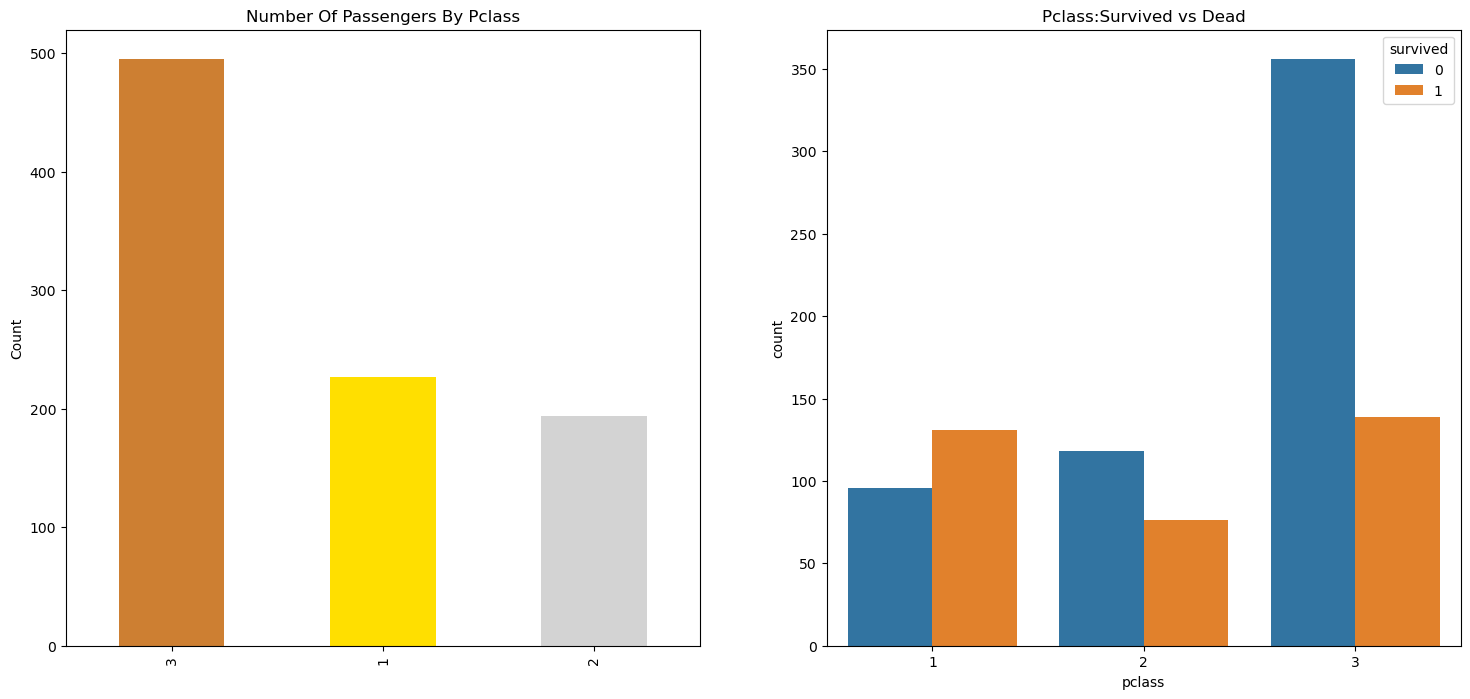

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic_origin['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('pclass',hue='survived',data=titanic_origin,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

#### Age 분석

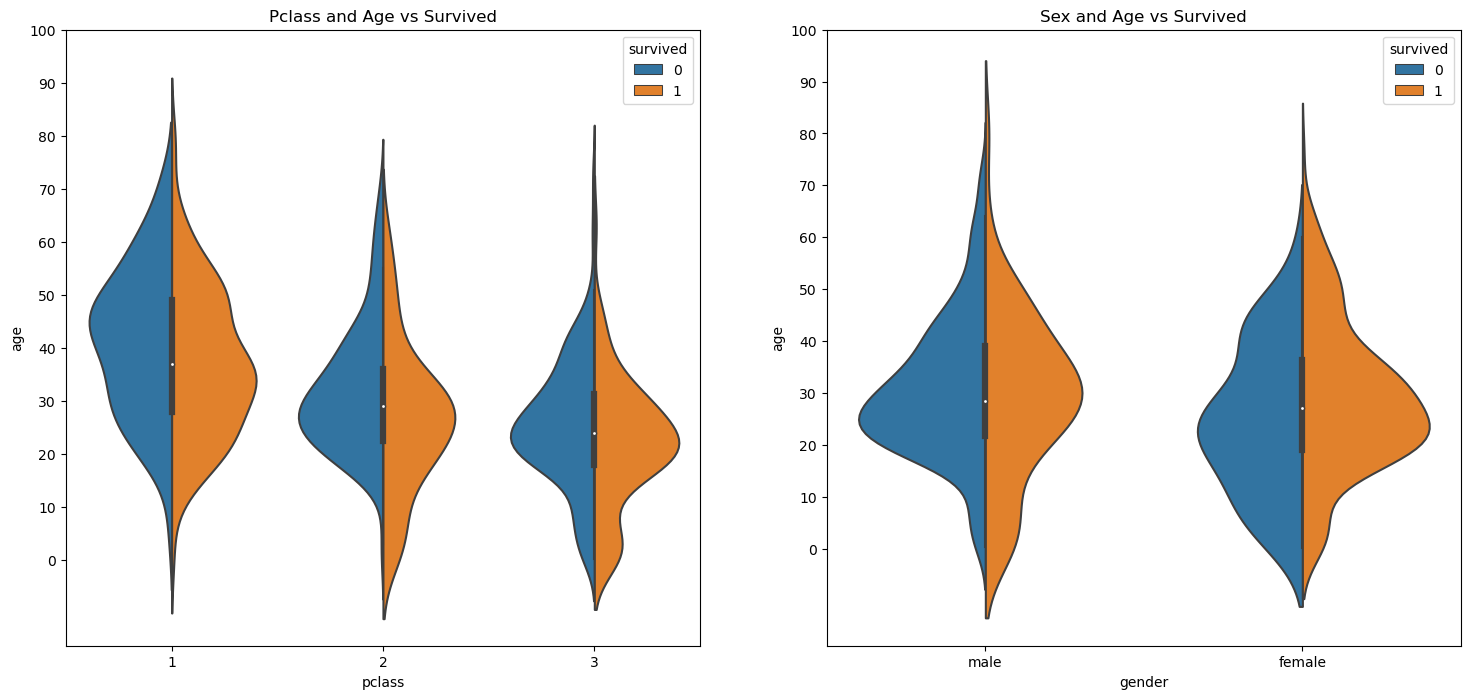

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age", hue="survived", data=titanic_origin,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("gender","age", hue="survived", data=titanic_origin,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Initial 추출(Mr, Miss, 등)

In [13]:
# it looks for strings which lie between A-Z or a-z and followed by a .(dot).

titanic_origin['initial']=0
for i in titanic_origin:
    titanic_origin['initial']=titanic_origin.name.str.extract('([A-Za-z]+)\.') # extract the Salutations

titanic_test_origin['initial']=0
for i in titanic_test_origin:
    titanic_test_origin['initial']=titanic_test_origin.name.str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(titanic_origin.initial,titanic_origin.gender).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Major,Master,Miss,Mlle,Mr,Mrs,Ms,Rev,Sir
gender,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,185,1,0,138,1,0,0
male,1,3,0,1,4,1,2,42,0,0,528,0,0,6,1


In [15]:
# initial 값을 Miss, Mr, Mrs, Mrs, Other로 통일
titanic_origin['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                                  ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

# initial 값을 Miss, Mr, Mrs, Mrs, Other로 통일
titanic_test_origin['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                                  ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
titanic_origin.groupby('initial')['age'].mean() #lets check the average age by Initials

initial
Master     5.352286
Miss      21.788693
Mr        32.264286
Mrs       36.796610
Other     44.400000
Name: age, dtype: float64

### 문자형 데이터 정보 파악

In [17]:
titanic_origin.describe(exclude = np.number)

,name,gender,ticket,cabin,embarked,initial
count,916,916,916,198,915,916
unique,915,2,703,146,3,5
top,"Connolly, Miss. Kate",male,CA. 2343,G6,S,Mr
freq,2,589,7,4,645,538


In [18]:
titanic_origin[titanic_origin.name.str.contains('Connolly')]
# 동명이인이 한 명 있다.

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,initial
210,210,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
320,320,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,Miss


In [19]:
# name, ticket, cabin은 고유값도 많고 결측치도 많으므로 제외(1차 시도)
# 이후에는 하나씩 family name(성), ticket의 정보, cabin에 대하여 좀더 고려해보자

# 2. Data Cleaning

## 중복 제거

In [20]:
# 중복제거
print(f'before: {titanic_origin.shape}')
titanic_origin.drop_duplicates(keep='first', inplace=True, ignore_index=True)
titanic_test_origin.drop_duplicates(keep='first', inplace=True, ignore_index=True)
print(f'after: {titanic_origin.shape}')

# drop_duplicates 적용 전ㆍ후 차이가 없으므로 중복행이 없다는 것을 알 수 있다.

before: (916, 13)
after: (916, 13)


## 결측치 파악

In [21]:
titanic_origin.isnull().sum()
# age, cabin, embarked이 null값을 가지고 있다.

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          718
embarked         1
initial          0
dtype: int64

In [22]:
# cabin은 1차 시도에서 제외하기로 결정하였으니 age와 embark의 결측치를 채우자
# embark는 최빈값(mode)로 채워주고, age는 파악해보자

In [23]:
titanic_test_origin.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          296
embarked         1
initial          0
dtype: int64

In [24]:
# test data에 fare에 결측치가 존재하므로 test data fare의 최빈값을 넣자(mode)

### test data fare 결측치 채우기

In [25]:
# train data fare 확인
titanic_origin['fare'].value_counts(dropna=False)

13.0000    45
8.0500     43
26.0000    36
7.7500     33
7.8958     29
           ..
61.9792     1
50.4958     1
69.3000     1
63.3583     1
27.4458     1
Name: fare, Length: 251, dtype: int64

In [26]:
# 최빈값
fare_mode = titanic_origin['fare'].mode().values[0]
# S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 '13.0000' 반환 가능)

# NA imputation
titanic_test_origin['fare'] = titanic_test_origin['fare'].fillna(fare_mode)
# train의 최빈값을 test에 모두 채워준다.

# 확인
print(titanic_test_origin['fare'].isnull().sum())

0


### embark 결측치 채우기

In [27]:
# 범주 별 빈도 수 확인
titanic_origin['embarked'].value_counts(dropna=False)

S      645
C      189
Q       81
NaN      1
Name: embarked, dtype: int64

In [28]:
# 최빈값
embarked_mode = titanic_origin['embarked'].mode().values[0]
# S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 'S' 반환 가능)

# NA imputation
titanic_origin['embarked_filled'] = titanic_origin['embarked'].fillna(embarked_mode)
titanic_test_origin['embarked_filled'] = titanic_test_origin['embarked'].fillna(embarked_mode)
# train의 최빈값을 train,test에 모두 채워준다.

# 확인
print(f"before : {titanic_origin['embarked'].isnull().sum()}")
print(f"after : {titanic_origin['embarked_filled'].isnull().sum()}")

before : 1
after : 0


### age 결측치 채우기

In [29]:
titanic_origin['age_mean'] = titanic_origin['age'].fillna(titanic_origin['age'].mean())
titanic_origin['age_median'] = titanic_origin['age'].fillna(titanic_origin['age'].median())
titanic_origin[['age_mean', 'age_median']].isnull().sum().sum()

0

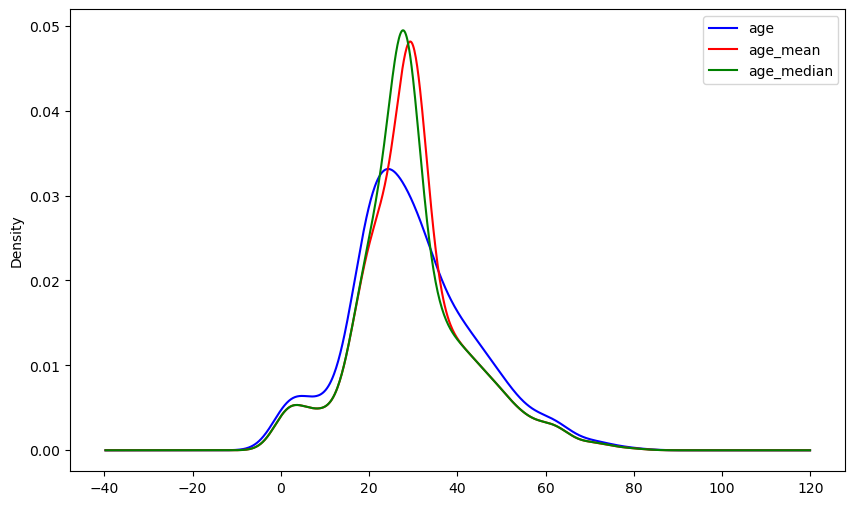

In [30]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

titanic_origin['age'].plot(kind='kde', ax=ax, color='blue')
titanic_origin['age_mean'].plot(kind='kde', ax=ax, color='red')
titanic_origin['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# 아래 그래프와 같이 평균과 중앙값을 쓰면 데이터 왜곡이 크므로 사용해서는 안 된다.

In [31]:
titanic_origin['age_random'] = titanic_origin['age']

# random sampling
random_sampling = (titanic_origin['age'].dropna().sample(titanic_origin['age'].isnull().sum()))
random_sampling.index = titanic_origin[lambda x: x['age'].isnull()].index # index 부여
# 결측치가 있는 자리의 인덱스 추출

# NA imputation
titanic_origin.loc[titanic_origin['age'].isnull(), 'age_random'] = random_sampling

# 확인
titanic_origin[['age', 'age_random']].isnull().sum()

age           180
age_random      0
dtype: int64

In [32]:
titanic_origin[['age_random', 'age']].head(3) # 올바르게 데이터가 있는지 확인

,age_random,age
0,35.0,NaN
1,35.0,NaN
2,52.0,52.0


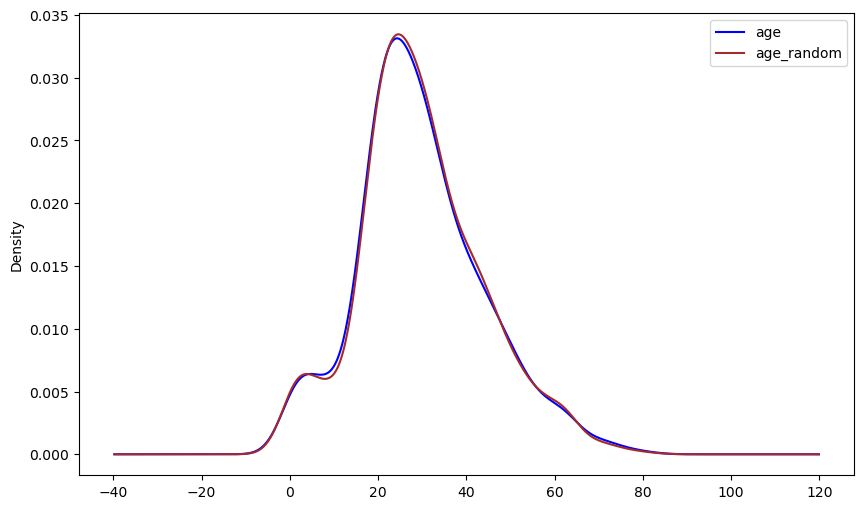

In [33]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

titanic_origin['age'].plot(kind='kde', ax=ax, color='blue')
titanic_origin['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### test data 결측치 채우기

In [34]:
titanic_test_origin['age_random'] = titanic_test_origin['age']

# random sampling
random_sampling = (titanic_origin['age'].dropna().sample(titanic_test_origin['age'].isnull().sum()))
random_sampling.index = titanic_test_origin[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
titanic_test_origin.loc[titanic_test_origin['age'].isnull(), 'age_random'] = random_sampling

### 데이터 타입 정리

In [35]:
titanic_origin = titanic_origin.drop(labels = ["embarked", "age_mean", "age_median"], axis = 1)
titanic_test_origin = titanic_test_origin.drop(labels = ["embarked",], axis = 1)

In [36]:
titanic_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengerid      916 non-null    int64  
 1   survived         916 non-null    int64  
 2   pclass           916 non-null    int64  
 3   name             916 non-null    object 
 4   gender           916 non-null    object 
 5   age              736 non-null    float64
 6   sibsp            916 non-null    int64  
 7   parch            916 non-null    int64  
 8   ticket           916 non-null    object 
 9   fare             916 non-null    float64
 10  cabin            198 non-null    object 
 11  initial          916 non-null    object 
 12  embarked_filled  916 non-null    object 
 13  age_random       916 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 100.3+ KB


In [37]:
titanic_origin.loc[titanic_origin["gender"] == 'male', 'gender'] = 0
titanic_origin.loc[titanic_origin["gender"] == 'female', 'gender'] = 1

titanic_test_origin.loc[titanic_test_origin["gender"] == 'male', 'gender'] = 0
titanic_test_origin.loc[titanic_test_origin["gender"] == 'female', 'gender'] = 1


titanic_origin.loc[titanic_origin["embarked_filled"] == 'S', 'embarked_filled'] = 0
titanic_origin.loc[titanic_origin["embarked_filled"] == 'C', 'embarked_filled'] = 1
titanic_origin.loc[titanic_origin["embarked_filled"] == 'Q', 'embarked_filled'] = 2

titanic_test_origin.loc[titanic_test_origin["embarked_filled"] == 'S', 'embarked_filled'] = 0
titanic_test_origin.loc[titanic_test_origin["embarked_filled"] == 'C', 'embarked_filled'] = 1
titanic_test_origin.loc[titanic_test_origin["embarked_filled"] == 'Q', 'embarked_filled'] = 2

In [38]:
titanic_origin.gender = titanic_origin.gender.astype('int32')
titanic_origin.embarked_filled = titanic_origin.embarked_filled.astype('int32')

titanic_test_origin.gender = titanic_test_origin.gender.astype('int32')
titanic_test_origin.embarked_filled = titanic_test_origin.embarked_filled.astype('int32')

In [39]:
titanic_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengerid      916 non-null    int64  
 1   survived         916 non-null    int64  
 2   pclass           916 non-null    int64  
 3   name             916 non-null    object 
 4   gender           916 non-null    int32  
 5   age              736 non-null    float64
 6   sibsp            916 non-null    int64  
 7   parch            916 non-null    int64  
 8   ticket           916 non-null    object 
 9   fare             916 non-null    float64
 10  cabin            198 non-null    object 
 11  initial          916 non-null    object 
 12  embarked_filled  916 non-null    int32  
 13  age_random       916 non-null    float64
dtypes: float64(3), int32(2), int64(5), object(4)
memory usage: 93.2+ KB


# 3. Feature Extraction

## Basic Model(name, cabin, ticket 제외)

In [40]:
titanic = titanic_origin.copy()
titanic_test = titanic_test_origin.copy()

In [41]:
titanic = titanic.drop(labels = ["name", "ticket", "cabin", "initial", "age"], axis = 1)
titanic_test = titanic_test.drop(labels = ["name", "ticket", "cabin", "initial", "age"], axis = 1)

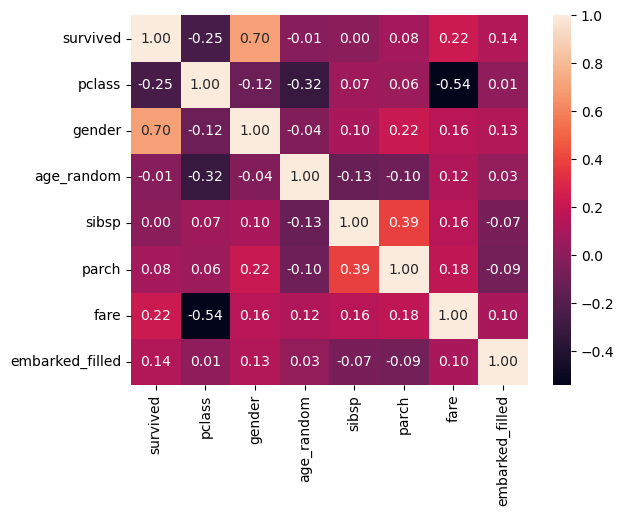

In [42]:
list1 = ['survived', 'pclass', 'gender', 'age_random', 'sibsp', 'parch', 'fare', 'embarked_filled']
sns.heatmap(titanic[list1].corr(), annot = True, fmt = ".2f")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived', 'passengerid'], axis=1)
target = titanic["survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.3, stratify = titanic['survived'], random_state = 0)

In [44]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((641, 7), (275, 7), (641,), (275,))

In [45]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 82.91
------------------------------
Logistic Regression : 85.09
------------------------------
Support Vector Machines : 65.45
------------------------------
Linear SVC : 66.55
------------------------------
Perceptron : 62.18
------------------------------
Decision Tree : 79.64
------------------------------
Random Forest : 81.82
------------------------------
KNN or k-Nearest Neighbors : 63.27
------------------------------
Stochastic Gradient Descent : 79.27
------------------------------
Gradient Boosting Classifier : 85.09


In [46]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,85.09
9,Gradient Boosting Classifier,85.09
4,Naive Bayes,82.91
3,Random Forest,81.82
7,Decision Tree,79.64
8,Stochastic Gradient Descent,79.27
6,Linear SVC,66.55
0,Support Vector Machines,65.45
1,KNN,63.27
5,Perceptron,62.18


In [47]:
# basic model

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = logreg.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('basic_submission.csv', index=False)

In [48]:
# basic model

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = decisiontree.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('basic_submission_decisiontree.csv', index=False)

## Model 1(age를 나이대(20살 간격)으로 구분)

In [49]:
titanic = titanic_origin.copy()
titanic_test = titanic_test_origin.copy()

### age의 나이대를 구분하기

In [50]:
titanic.loc[titanic['age_random']<=20, 'age_random']=0
titanic.loc[(titanic['age_random']<=40)&(titanic['age_random']>20), 'age_random']=1
titanic.loc[(titanic['age_random']<=60)&(titanic['age_random']>40), 'age_random']=2
titanic.loc[(titanic['age_random']<=80)&(titanic['age_random']>60), 'age_random']=3
titanic.loc[titanic['age_random']>80, 'age_random']=4

# test data도 나이 구분하기
titanic_test.loc[titanic_test['age_random']<=20, 'age_random']=0
titanic_test.loc[(titanic_test['age_random']<=40)&(titanic_test['age_random']>20), 'age_random']=1
titanic_test.loc[(titanic['age_random']<=60)&(titanic_test['age_random']>40), 'age_random']=2
titanic_test.loc[(titanic['age_random']<=80)&(titanic_test['age_random']>60), 'age_random']=3
titanic_test.loc[titanic['age_random']>80, 'age_random']=4

### 데이터 정리

In [51]:
titanic = titanic.drop(labels = ["name", "ticket", "cabin", "initial", "age"], axis = 1)
titanic_test = titanic_test.drop(labels = ["name", "ticket", "cabin", "initial", "age"], axis = 1)

### 데이터간 상관관계 확인하기

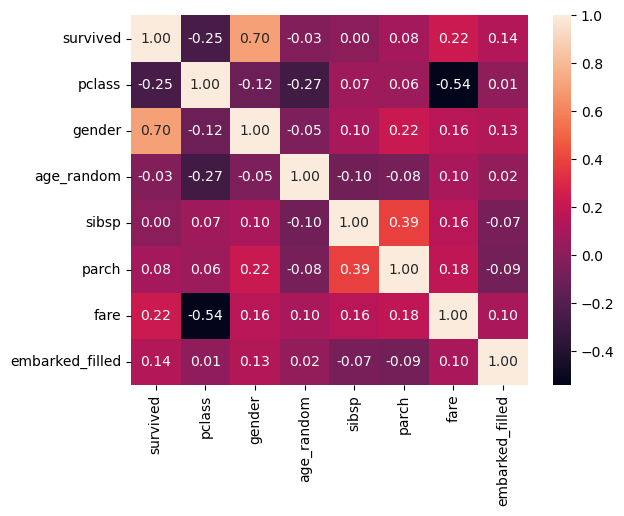

In [52]:
list1 = ['survived', 'pclass', 'gender', 'age_random', 'sibsp', 'parch', 'fare', 'embarked_filled']
sns.heatmap(titanic[list1].corr(), annot = True, fmt = ".2f")
plt.show()

### 4. Machine Learning

In [53]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived', 'passengerid'], axis=1)
target = titanic["survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

#### Gaussian Naive Bayes

In [54]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

80.98


#### Logistic Regression

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.98


#### Support Vector Machines(SVM)

In [56]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

68.48


#### Linear SVC

In [57]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

80.43


#### Perceptron 

In [58]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

74.46


#### Decision Tree

In [59]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.89


#### Random Forest

In [60]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.35


#### KNN

In [61]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

73.37


#### Stochastic Gradient Descent

In [62]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.26


#### Gradient Boosting Classifier

In [63]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

80.43


#### Synthesis Model results(모델별 결과 종합)

In [64]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,80.98
4,Naive Bayes,80.98
6,Linear SVC,80.43
9,Gradient Boosting Classifier,80.43
7,Decision Tree,79.89
3,Random Forest,79.35
8,Stochastic Gradient Descent,78.26
5,Perceptron,74.46
1,KNN,73.37
0,Support Vector Machines,68.48


### Predict and Save

In [65]:
# Train : test = 8 : 2

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = logreg.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission.csv', index=False)

## Model 2(Model 1에서 train_test_split에서 stratify 인수 추가)

### 4. Machine Learning

In [66]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived', 'passengerid'], axis=1)
target = titanic["survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, stratify = titanic['survived'], random_state = 0)

#### Gaussian Naive Bayes

In [67]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

83.15


#### Logistic Regression

In [68]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

84.24


#### Support Vector Machines(SVM)

In [69]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

65.76


#### Linear SVC

In [70]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

82.07


#### Perceptron 

In [71]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

45.11


#### Decision Tree

In [72]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.89


#### Random Forest

In [73]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

80.98


#### KNN

In [74]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

70.65


#### Stochastic Gradient Descent

In [75]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

71.2


#### Gradient Boosting Classifier

In [76]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.24


#### Synthesis Model results(모델별 결과 종합)

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,84.24
9,Gradient Boosting Classifier,84.24
4,Naive Bayes,83.15
6,Linear SVC,82.07
3,Random Forest,80.98
7,Decision Tree,79.89
8,Stochastic Gradient Descent,71.20
1,KNN,70.65
0,Support Vector Machines,65.76
5,Perceptron,45.11


### Predict and Save

In [78]:
# train test split에서 stratify를 추가함

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = logreg.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission2.csv', index=False)

## Model 3(family size로 구분)

In [79]:
titanic = titanic_origin.copy()
titanic_test = titanic_test_origin.copy()

In [80]:
titanic

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,initial,embarked_filled,age_random
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,NaN,0,0,SC/PARIS 2159,12.8750,NaN,Mr,0,35.0
1,1,0,3,"Henry, Miss. Delia",1,NaN,0,0,382649,7.7500,NaN,Miss,2,35.0
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,B69,Mrs,0,52.0
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.0,0,0,350043,7.7958,NaN,Mr,0,27.0
4,4,0,2,"Hold, Mr. Stephen",0,44.0,1,0,26707,26.0000,NaN,Mr,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,0,3,"Thomas, Mr. Charles P",0,NaN,1,0,2621,6.4375,NaN,Mr,1,31.0
912,912,0,3,"Cacic, Mr. Jego Grga",0,18.0,0,0,315091,8.6625,NaN,Mr,0,18.0
913,913,0,2,"Pengelly, Mr. Frederick William",0,19.0,0,0,28665,10.5000,NaN,Mr,0,19.0
914,914,1,3,"Mullens, Miss. Katherine ""Katie""",1,NaN,0,0,35852,7.7333,NaN,Miss,2,1.0


### family size

In [81]:
# sibsp랑 parch 구분
titanic['family_size'] = 0
titanic['family_size'] = titanic['parch'] + titanic['sibsp']#family size
titanic['alone'] = 0
titanic.loc[titanic.family_size==0,'alone'] = 1 #Alone
titanic

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,initial,embarked_filled,age_random,family_size,alone
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,NaN,0,0,SC/PARIS 2159,12.8750,NaN,Mr,0,35.0,0,1
1,1,0,3,"Henry, Miss. Delia",1,NaN,0,0,382649,7.7500,NaN,Miss,2,35.0,0,1
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,B69,Mrs,0,52.0,2,0
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.0,0,0,350043,7.7958,NaN,Mr,0,27.0,0,1
4,4,0,2,"Hold, Mr. Stephen",0,44.0,1,0,26707,26.0000,NaN,Mr,0,44.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,0,3,"Thomas, Mr. Charles P",0,NaN,1,0,2621,6.4375,NaN,Mr,1,31.0,1,0
912,912,0,3,"Cacic, Mr. Jego Grga",0,18.0,0,0,315091,8.6625,NaN,Mr,0,18.0,0,1
913,913,0,2,"Pengelly, Mr. Frederick William",0,19.0,0,0,28665,10.5000,NaN,Mr,0,19.0,0,1
914,914,1,3,"Mullens, Miss. Katherine ""Katie""",1,NaN,0,0,35852,7.7333,NaN,Miss,2,1.0,0,1


In [82]:
# test data에도 똑같이 적용
titanic_test['family_size'] = 0
titanic_test['family_size'] = titanic_test['parch'] + titanic_test['sibsp']#family size
titanic_test['alone'] = 0
titanic_test.loc[titanic.family_size==0,'alone'] = 1 #Alone

In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengerid      916 non-null    int64  
 1   survived         916 non-null    int64  
 2   pclass           916 non-null    int64  
 3   name             916 non-null    object 
 4   gender           916 non-null    int32  
 5   age              736 non-null    float64
 6   sibsp            916 non-null    int64  
 7   parch            916 non-null    int64  
 8   ticket           916 non-null    object 
 9   fare             916 non-null    float64
 10  cabin            198 non-null    object 
 11  initial          916 non-null    object 
 12  embarked_filled  916 non-null    int32  
 13  age_random       916 non-null    float64
 14  family_size      916 non-null    int64  
 15  alone            916 non-null    int64  
dtypes: float64(3), int32(2), int64(7), object(4)
memory usage: 107

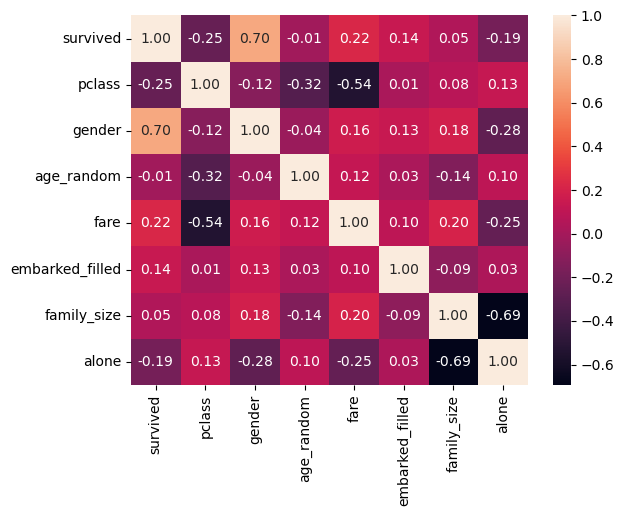

In [84]:
list1 = ['survived', 'pclass', 'gender', 'age_random', 'fare', 'embarked_filled', 'family_size', 'alone']
sns.heatmap(titanic[list1].corr(), annot = True, fmt = ".2f")
plt.show()

### 데이터 정리

In [85]:
titanic = titanic.drop(labels = ["name", "ticket", "cabin", "sibsp", "parch", "age", "initial"], axis = 1)
titanic_test = titanic_test.drop(labels = ["name", "ticket", "cabin", "sibsp", "parch", "age", "initial"], axis = 1)

### 4. Machine Learning

In [86]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived', 'passengerid'], axis=1)
target = titanic["survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, stratify = titanic['survived'], random_state = 0)

In [87]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

83.7


In [88]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

83.7


In [89]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

65.22


In [90]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

50.0


In [91]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

44.02


In [92]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.43


In [93]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.07


In [94]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

60.87


In [95]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

80.98


In [96]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.7


In [97]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,83.70
4,Naive Bayes,83.70
9,Gradient Boosting Classifier,83.70
3,Random Forest,82.07
8,Stochastic Gradient Descent,80.98
7,Decision Tree,80.43
0,Support Vector Machines,65.22
1,KNN,60.87
6,Linear SVC,50.00
5,Perceptron,44.02


### Predict and Save

In [98]:
# family size를 토대로 학습

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = logreg.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission3.csv', index=False)

## Model 4(family size + age seperate)

In [99]:
# family size + age seperate
titanic.loc[titanic['age_random']<=20, 'age_random']=0
titanic.loc[(titanic['age_random']<=40)&(titanic['age_random']>20), 'age_random']=1
titanic.loc[(titanic['age_random']<=60)&(titanic['age_random']>40), 'age_random']=2
titanic.loc[(titanic['age_random']<=80)&(titanic['age_random']>60), 'age_random']=3
titanic.loc[titanic['age_random']>80, 'age_random']=4

# test data도 나이 구분하기
titanic_test.loc[titanic_test['age_random']<=20, 'age_random']=0
titanic_test.loc[(titanic_test['age_random']<=40)&(titanic_test['age_random']>20), 'age_random']=1
titanic_test.loc[(titanic['age_random']<=60)&(titanic_test['age_random']>40), 'age_random']=2
titanic_test.loc[(titanic['age_random']<=80)&(titanic_test['age_random']>60), 'age_random']=3
titanic_test.loc[titanic['age_random']>80, 'age_random']=4

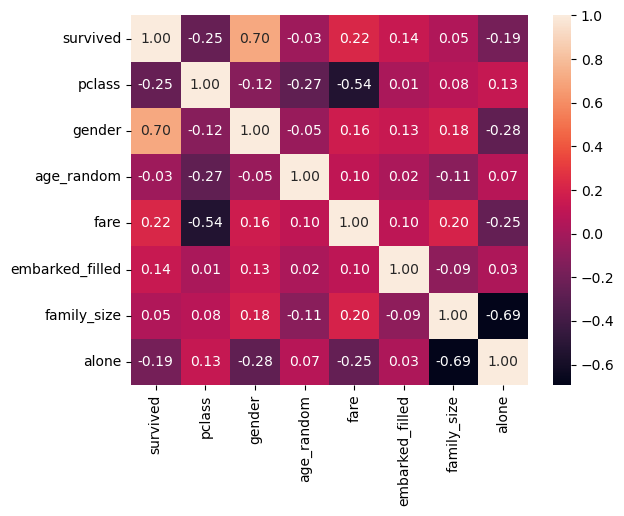

In [100]:
list1 = ['survived', 'pclass', 'gender', 'age_random', 'fare', 'embarked_filled', 'family_size', 'alone']
sns.heatmap(titanic[list1].corr(), annot = True, fmt = ".2f")
plt.show()

In [101]:
titanic

,passengerid,survived,pclass,gender,fare,embarked_filled,age_random,family_size,alone
0,0,0,2,0,12.8750,0,1.0,0,1
1,1,0,3,1,7.7500,2,1.0,0,1
2,2,1,1,1,93.5000,0,2.0,2,0
3,3,1,3,0,7.7958,0,1.0,0,1
4,4,0,2,0,26.0000,0,2.0,1,0
...,...,...,...,...,...,...,...,...,...
911,911,0,3,0,6.4375,1,1.0,1,0
912,912,0,3,0,8.6625,0,0.0,0,1
913,913,0,2,0,10.5000,0,0.0,0,1
914,914,1,3,1,7.7333,2,0.0,0,1


### 4. Machine Learning

In [102]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived', 'passengerid'], axis=1)
target = titanic["survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, stratify = titanic['survived'], random_state = 0)

In [103]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 83.7
------------------------------
Logistic Regression : 83.7
------------------------------
Support Vector Machines : 65.76
------------------------------
Linear SVC : 84.24
------------------------------
Perceptron : 74.46
------------------------------
Decision Tree : 80.98
------------------------------
Random Forest : 79.89
------------------------------
KNN or k-Nearest Neighbors : 74.46
------------------------------
Stochastic Gradient Descent : 84.24
------------------------------
Gradient Boosting Classifier : 85.33


#### Synthesis Model results(모델별 결과 종합)

In [104]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,85.33
6,Linear SVC,84.24
8,Stochastic Gradient Descent,84.24
2,Logistic Regression,83.70
4,Naive Bayes,83.70
7,Decision Tree,80.98
3,Random Forest,79.89
1,KNN,74.46
5,Perceptron,74.46
0,Support Vector Machines,65.76


### Predict and Save

In [105]:
# family size + age seperate

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = logreg.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission4.csv', index=False)

## Model 5(fare rank + age seperate)

### fare 구분

In [106]:
titanic.fare.describe()

count    916.000000
mean      32.402710
std       50.506411
min        0.000000
25%        7.895800
50%       14.458300
75%       30.017700
max      512.329200
Name: fare, dtype: float64

In [107]:
# 요금을 4단계로 동등한 숫자만큼 나누기
titanic['fare_range']=pd.qcut(titanic['fare'],8)
titanic.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
fare_range,
"(-0.001, 7.75]",0.251748
"(7.75, 7.896]",0.215909
"(7.896, 10.207]",0.230088
"(10.207, 14.458]",0.318966
"(14.458, 24.15]",0.465517
"(24.15, 30.018]",0.414414
"(30.018, 68.288]",0.473684
"(68.288, 512.329]",0.643478


In [108]:
titanic['fare_rank']=0
titanic.loc[titanic['fare']<=7.75,'fare_rank'] = 0
titanic.loc[(titanic['fare']>7.75)&(titanic['fare']<=7.896),'fare_rank'] = 1
titanic.loc[(titanic['fare']>7.896)&(titanic['fare']<=10.207),'fare_rank'] = 2
titanic.loc[(titanic['fare']>10.207)&(titanic['fare']<=14.458),'fare_rank'] = 3
titanic.loc[(titanic['fare']>14.458)&(titanic['fare']<=24.15),'fare_rank'] = 4
titanic.loc[(titanic['fare']>24.15)&(titanic['fare']<=30.018),'fare_rank'] = 5
titanic.loc[(titanic['fare']>30.018)&(titanic['fare']<=68.288),'fare_rank'] = 6
titanic.loc[titanic['fare']>68.288,'fare_rank'] = 7

titanic_test['fare_rank']=0
titanic_test.loc[titanic_test['fare']<=7.75,'fare_rank'] = 0
titanic_test.loc[(titanic_test['fare']>7.75)&(titanic_test['fare']<=7.896),'fare_rank'] = 1
titanic_test.loc[(titanic_test['fare']>7.896)&(titanic_test['fare']<=10.207),'fare_rank'] = 2
titanic_test.loc[(titanic_test['fare']>10.207)&(titanic_test['fare']<=14.458),'fare_rank'] = 3
titanic_test.loc[(titanic_test['fare']>14.458)&(titanic_test['fare']<=24.15),'fare_rank'] = 4
titanic_test.loc[(titanic_test['fare']>24.15)&(titanic_test['fare']<=30.018),'fare_rank'] = 5
titanic_test.loc[(titanic_test['fare']>30.018)&(titanic_test['fare']<=68.288),'fare_rank'] = 6
titanic_test.loc[titanic_test['fare']>68.288,'fare_rank'] = 7

In [109]:
titanic = titanic.drop(labels = ["fare", "fare_range"], axis = 1)
titanic_test = titanic_test.drop(labels = ["fare"], axis = 1)
titanic

,passengerid,survived,pclass,gender,embarked_filled,age_random,family_size,alone,fare_rank
0,0,0,2,0,0,1.0,0,1,3
1,1,0,3,1,2,1.0,0,1,0
2,2,1,1,1,0,2.0,2,0,7
3,3,1,3,0,0,1.0,0,1,1
4,4,0,2,0,0,2.0,1,0,5
...,...,...,...,...,...,...,...,...,...
911,911,0,3,0,1,1.0,1,0,0
912,912,0,3,0,0,0.0,0,1,2
913,913,0,2,0,0,0.0,0,1,3
914,914,1,3,1,2,0.0,0,1,0


### 상관관계

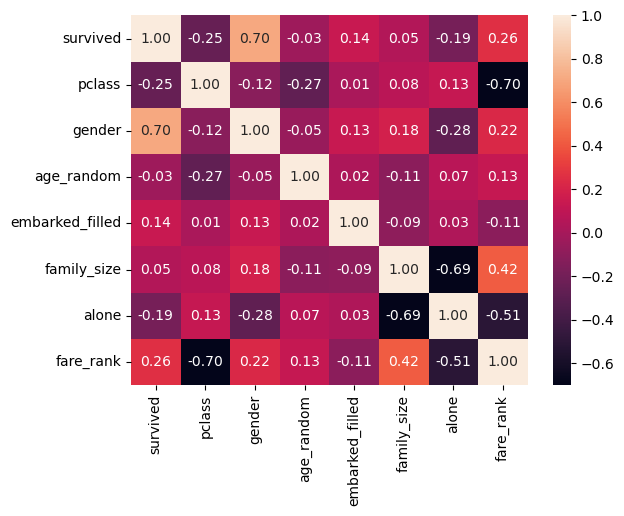

In [110]:
list1 = ['survived', 'pclass', 'gender', 'age_random', 'embarked_filled', 'family_size', 'alone', 'fare_rank']
sns.heatmap(titanic[list1].corr(), annot = True, fmt = ".2f")
plt.show()

### 4. Machine Learning

In [111]:
# family_size, age seperate, fare rank를 통해 판단

In [112]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived', 'passengerid'], axis=1)
target = titanic["survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, stratify = titanic['survived'], random_state = 0)

In [113]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 84.24
------------------------------
Logistic Regression : 84.24
------------------------------
Support Vector Machines : 84.24
------------------------------
Linear SVC : 84.24
------------------------------
Perceptron : 38.04
------------------------------
Decision Tree : 79.89
------------------------------
Random Forest : 82.61
------------------------------
KNN or k-Nearest Neighbors : 81.52
------------------------------
Stochastic Gradient Descent : 84.24
------------------------------
Gradient Boosting Classifier : 84.78


#### Synthesis Model results(모델별 결과 종합)

In [114]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.78
0,Support Vector Machines,84.24
2,Logistic Regression,84.24
4,Naive Bayes,84.24
6,Linear SVC,84.24
8,Stochastic Gradient Descent,84.24
3,Random Forest,82.61
1,KNN,81.52
7,Decision Tree,79.89
5,Perceptron,38.04


### Predict and Save

In [115]:
# family size + age seperate

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = sgd.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission5.csv', index=False)

In [116]:
# family size + age seperate

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = logreg.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission5_logreg.csv', index=False)

## Model 6(age를 initial별 평균으로 분류)

In [117]:
titanic = titanic_origin.copy()
titanic_test = titanic_test_origin.copy()

In [118]:
## Assigning the NaN Values with the Ceil values of the mean ages
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Mr'),'age']=32
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Mrs'),'age']=37
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Master'),'age']=5
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Miss'),'age']=22
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Other'),'age']=44

titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Mr'),'age']=32
titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Mrs'),'age']=37
titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Master'),'age']=5
titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Miss'),'age']=22
titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Other'),'age']=44

In [119]:
titanic

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,initial,embarked_filled,age_random
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",0,32.0,0,0,SC/PARIS 2159,12.8750,NaN,Mr,0,35.0
1,1,0,3,"Henry, Miss. Delia",1,22.0,0,0,382649,7.7500,NaN,Miss,2,35.0
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,B69,Mrs,0,52.0
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.0,0,0,350043,7.7958,NaN,Mr,0,27.0
4,4,0,2,"Hold, Mr. Stephen",0,44.0,1,0,26707,26.0000,NaN,Mr,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,0,3,"Thomas, Mr. Charles P",0,32.0,1,0,2621,6.4375,NaN,Mr,1,31.0
912,912,0,3,"Cacic, Mr. Jego Grga",0,18.0,0,0,315091,8.6625,NaN,Mr,0,18.0
913,913,0,2,"Pengelly, Mr. Frederick William",0,19.0,0,0,28665,10.5000,NaN,Mr,0,19.0
914,914,1,3,"Mullens, Miss. Katherine ""Katie""",1,22.0,0,0,35852,7.7333,NaN,Miss,2,1.0


In [120]:
titanic.age.isnull().sum()

0

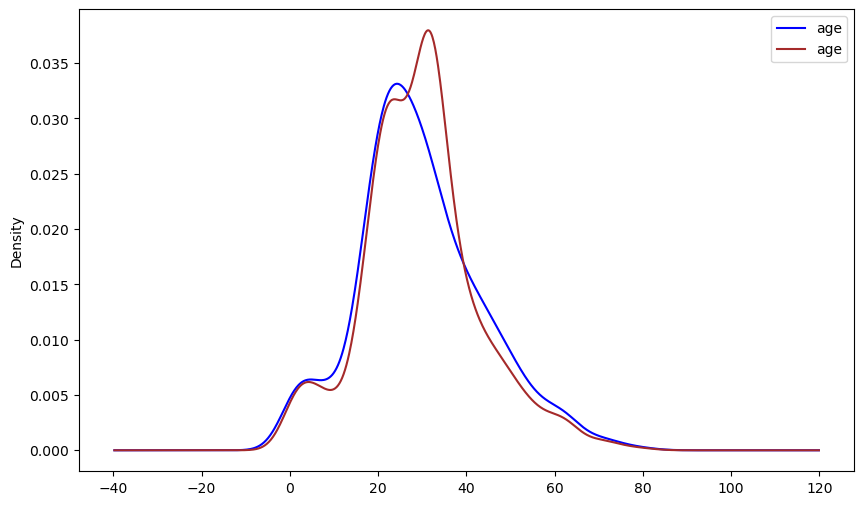

In [121]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

titanic_origin['age'].plot(kind='kde', ax=ax, color='blue')
titanic['age'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 상관관계 분석

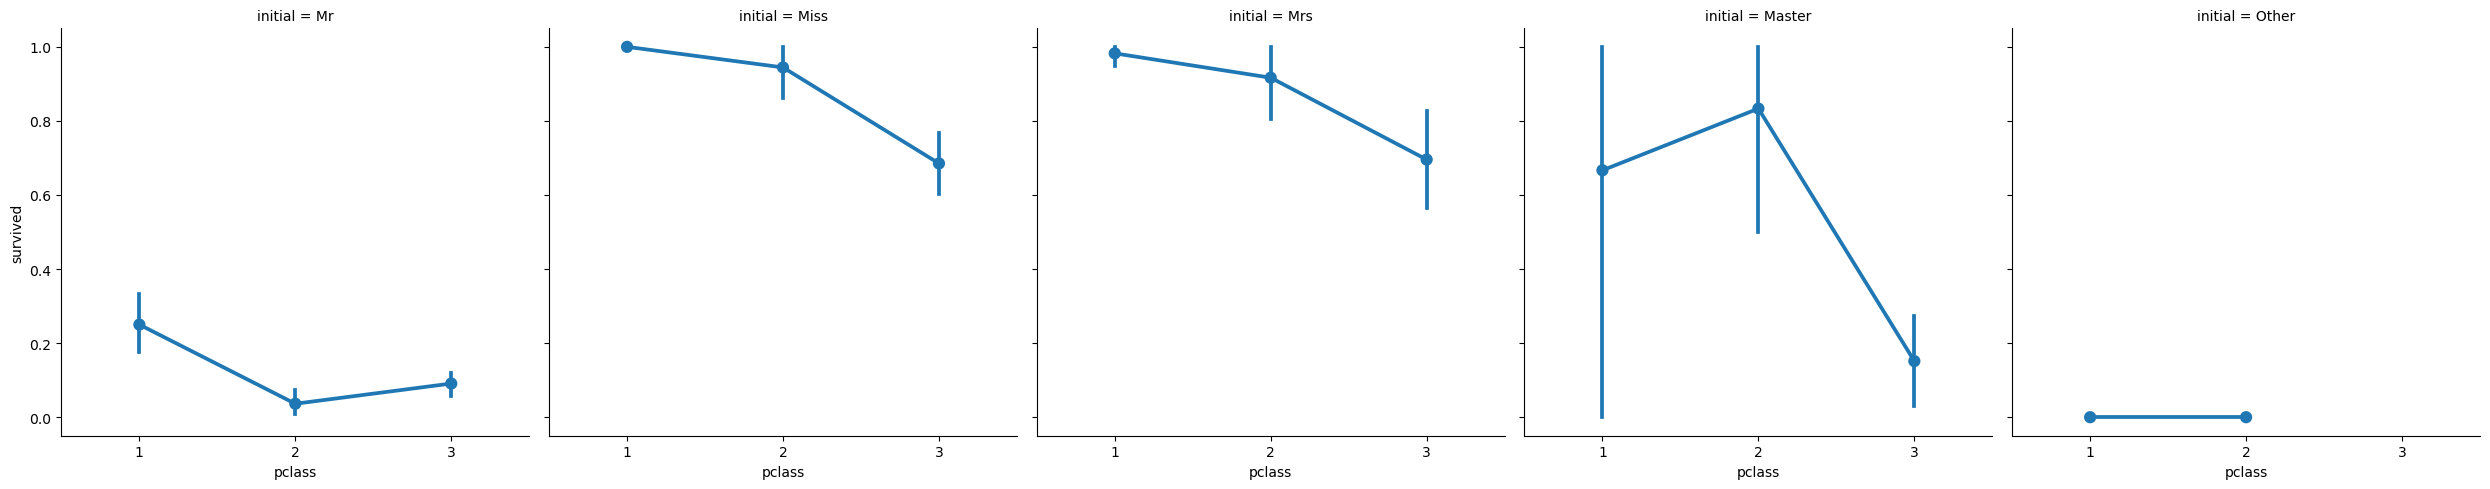

In [122]:
sns.factorplot('pclass','survived',col='initial',data=titanic)
plt.show()

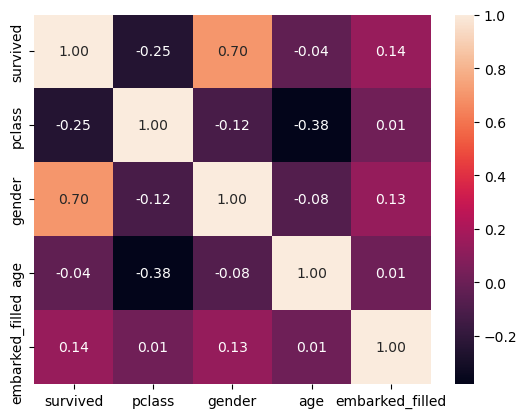

In [123]:
list1 = ['survived', 'pclass', 'gender', 'age', 'embarked_filled']
sns.heatmap(titanic[list1].corr(), annot = True, fmt = ".2f")
plt.show()

### 4. Machine Learning

In [124]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'initial', 'embarked_filled',
       'age_random'],
      dtype='object')

In [125]:
titanic_test.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'initial', 'embarked_filled', 'age_random'],
      dtype='object')

In [126]:
titanic = titanic.drop(labels = ["name", "ticket", "cabin", "sibsp", "parch", "initial", "age_random"], axis = 1)
titanic_test = titanic_test.drop(labels = ["name", "ticket", "cabin", "initial",  "sibsp", "parch", "age_random"], axis = 1)

In [127]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived', 'passengerid'], axis=1)
target = titanic["survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, stratify = titanic['survived'], random_state = 0)

In [128]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 83.7
------------------------------
Logistic Regression : 84.24
------------------------------
Support Vector Machines : 64.13
------------------------------
Linear SVC : 79.35
------------------------------
Perceptron : 44.57
------------------------------
Decision Tree : 80.43
------------------------------
Random Forest : 82.07
------------------------------
KNN or k-Nearest Neighbors : 62.5
------------------------------
Stochastic Gradient Descent : 72.83
------------------------------
Gradient Boosting Classifier : 84.24


#### Synthesis Model results(모델별 결과 종합)

In [129]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,84.24
9,Gradient Boosting Classifier,84.24
4,Naive Bayes,83.70
3,Random Forest,82.07
7,Decision Tree,80.43
6,Linear SVC,79.35
8,Stochastic Gradient Descent,72.83
0,Support Vector Machines,64.13
1,KNN,62.50
5,Perceptron,44.57


### Predict and Save

In [130]:
# initail fill age

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = logreg.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission6_logreg.csv', index=False)

In [131]:
# initail fill age random forest

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = randomforest.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission6_randomforest.csv', index=False)

## Model 7(initial 별 평균이 아닌 최빈값으로 채우기)

In [132]:
titanic = titanic_origin.copy()
titanic_test = titanic_test_origin.copy()

In [133]:
titanic.groupby('initial').age.apply(pd.Series.mode)

initial   
Master   0     2.0
         1     9.0
Miss     0    22.0
Mr       0    21.0
Mrs      0    24.0
         1    45.0
Other    0    28.0
         1    30.0
         2    38.0
         3    41.0
         4    42.0
         5    47.0
         6    51.0
         7    53.0
         8    54.0
         9    60.0
Name: age, dtype: float64

In [134]:
## Assigning the NaN Values with the Ceil values of the mean ages

# 값이 여러개일 경우 평균으로 지정
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Mr'),'age']=21
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Mrs'),'age']=35
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Master'),'age']=5
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Miss'),'age']=22
titanic.loc[(titanic.age.isnull())&(titanic.initial=='Other'),'age']=44

titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Mr'),'age']=21
titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Mrs'),'age']=35
titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Master'),'age']=5
titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Miss'),'age']=22
titanic_test.loc[(titanic_test.age.isnull())&(titanic_test.initial=='Other'),'age']=44

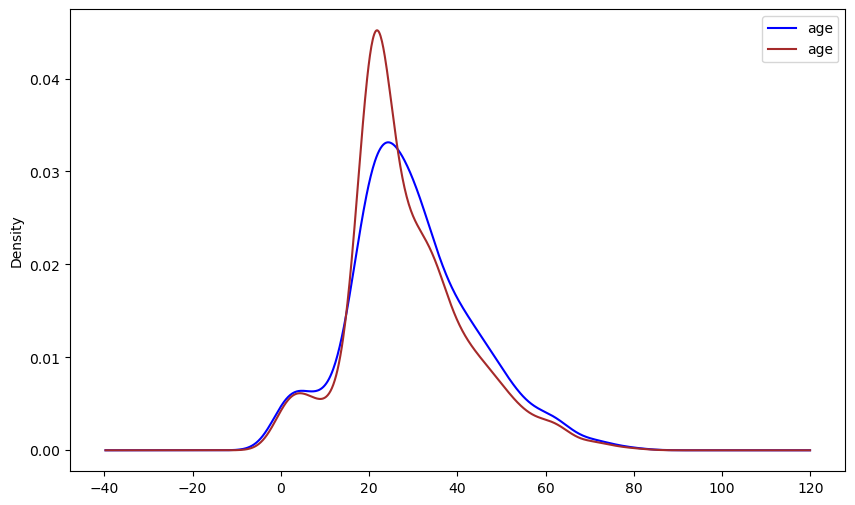

In [135]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

titanic_origin['age'].plot(kind='kde', ax=ax, color='blue')
titanic['age'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 상관관계 분석

In [136]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'initial', 'embarked_filled',
       'age_random'],
      dtype='object')

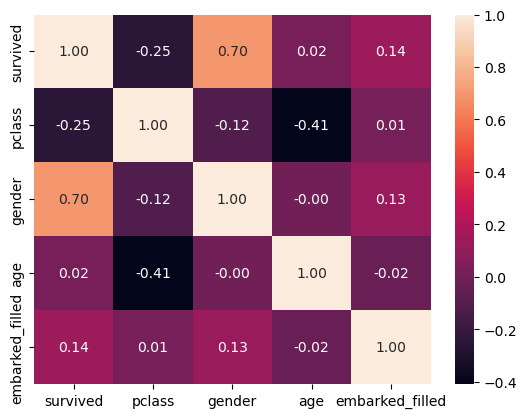

In [137]:
list1 = ['survived', 'pclass', 'gender', 'age', 'embarked_filled']
sns.heatmap(titanic[list1].corr(), annot = True, fmt = ".2f")
plt.show()

### 4. Machine Learning

In [138]:
titanic = titanic.drop(labels = ["name", "ticket", "cabin", "sibsp", "parch", "initial", "age_random"], axis = 1)
titanic_test = titanic_test.drop(labels = ["name", "ticket", "cabin", "initial",  "sibsp", "parch", "age_random"], axis = 1)

In [139]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived', 'passengerid'], axis=1)
target = titanic["survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, stratify = titanic['survived'], random_state = 0)

In [140]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 83.7
------------------------------
Logistic Regression : 84.24
------------------------------
Support Vector Machines : 64.13
------------------------------
Linear SVC : 84.24
------------------------------
Perceptron : 64.13
------------------------------
Decision Tree : 78.8
------------------------------
Random Forest : 80.43
------------------------------
KNN or k-Nearest Neighbors : 59.78
------------------------------
Stochastic Gradient Descent : 75.0
------------------------------
Gradient Boosting Classifier : 83.7


#### Synthesis Model results(모델별 결과 종합)

In [141]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,84.24
6,Linear SVC,84.24
4,Naive Bayes,83.70
9,Gradient Boosting Classifier,83.70
3,Random Forest,80.43
7,Decision Tree,78.80
8,Stochastic Gradient Descent,75.00
0,Support Vector Machines,64.13
5,Perceptron,64.13
1,KNN,59.78


### Predict and Save

In [142]:
# initial fill age by mode random forest

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = randomforest.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission7_randomforest.csv', index=False)

In [143]:
# initial fill age by mode logistic regression

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = logreg.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission7_logreg.csv', index=False)

In [144]:
# initial fill age by mode decision tree

#set ids as PassengerId and predict survival 
ids = titanic_test['passengerid']
predictions = decisiontree.predict(titanic_test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('submission7_decisiontree.csv', index=False)

## Model 8(initial mode age + fare seperate)